### Wednesday, January 3, 2024

This notebook was created from the HuggingFace Diffusers Docs, under the Tasks section, labelled as [Image-to-image](https://huggingface.co/docs/diffusers/using-diffusers/img2img)

This page includes a link to a Colab notebook, but this notebook is not the same as the page, so I have replicated the page to this notebook.

docker container start hfpt_Dec14


In [1]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16, use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

# 228m 30.6s

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [2]:
!ls /root/.cache/huggingface/hub

models--CompVis--stable-diffusion-v1-4
models--TheBloke--CodeLlama-34B-Instruct-GPTQ
models--TheBloke--Llama-2-13b-Chat-GPTQ
models--anton-l--ddpm-butterflies-128
models--google--ddpm-cat-256
models--google--ddpm-celebahq-256
models--google--ddpm-church-256
models--kandinsky-community--kandinsky-2-2-decoder
models--kandinsky-community--kandinsky-2-2-prior
models--microsoft--Orca-2-13b
models--mistralai--Mistral-7B-Instruct-v0.2
models--nitrosocke--Ghibli-Diffusion
models--runwayml--stable-diffusion-v1-5
models--stabilityai--sd-vae-ft-mse
version.txt
version_diffusers_cache.txt


In [ ]:
# docker cp c8324b70601d:///root/.cache/huggingface/hub/models--kandinsky-community--kandinsky-2-2-decoder /home/rob/Data3/huggingface/transformers
# Successfully copied 455MB to /home/rob/Data3/huggingface/transformers

In [3]:
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png")

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2_img2img.py:276: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/30 [00:00<?, ?it/s]

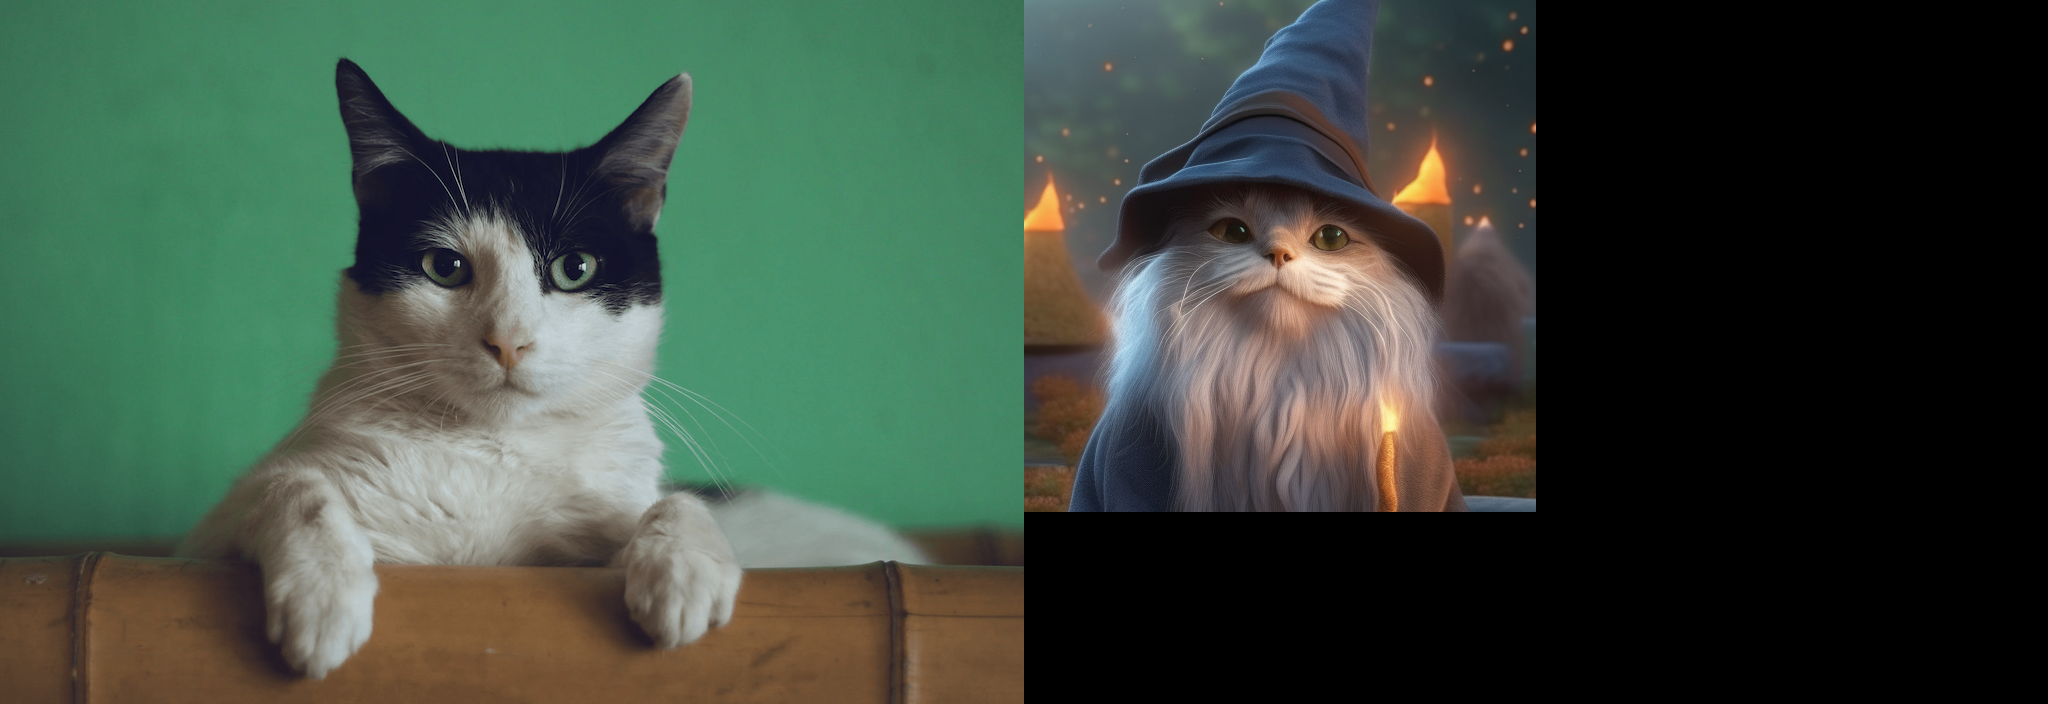

In [4]:
prompt = "cat wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

#### Stable Diffusion v1.5

In [5]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

# prepare image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/img2img-init.png"
init_image = load_image(url)

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

#### Stable Diffusion XL (SDXL)

In [ ]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

# prepare image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/img2img-sdxl-init.png"
init_image = load_image(url)

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image, strength=0.5).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

#### Kadinsky 2.2

In [ ]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16, use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

# prepare image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/img2img-init.png"
init_image = load_image(url)

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

#### Configure pipeline parameters

##### Strength

In [ ]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

# prepare image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/img2img-init.png"
init_image = load_image(url)

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image, strength=0.8).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

##### Guidance scale

In [ ]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

# prepare image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/img2img-init.png"
init_image = load_image(url)

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image, guidance_scale=8.0).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

##### Negative Prompt

In [ ]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

# prepare image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/img2img-init.png"
init_image = load_image(url)

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
negative_prompt = "ugly, deformed, disfigured, poor details, bad anatomy"

# pass prompt and image to pipeline
image = pipeline(prompt, negative_prompt=negative_prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

#### Chained Image-to-Image pipelines

##### Text-to-image-to-image

In [ ]:
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image
import torch
from diffusers.utils import make_image_grid

pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

text2image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k").images[0]
text2image

In [ ]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16, use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

image2image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", image=text2image).images[0]
make_image_grid([text2image, image2image], rows=1, cols=2)

##### Image-to-image-to-image

In [ ]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

# prepare image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/img2img-init.png"
init_image = load_image(url)

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image, output_type="latent").images[0]

In [ ]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "ogkalu/Comic-Diffusion", torch_dtype=torch.float16
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

# need to include the token "charliebo artstyle" in the prompt to use this checkpoint
image = pipeline("Astronaut in a jungle, charliebo artstyle", image=image, output_type="latent").images[0]

In [ ]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kohbanye/pixel-art-style", torch_dtype=torch.float16
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

# need to include the token "pixelartstyle" in the prompt to use this checkpoint
image = pipeline("Astronaut in a jungle, pixelartstyle", image=image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

##### Image-to-upscaler-to-super-resolution

In [ ]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

# prepare image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/img2img-init.png"
init_image = load_image(url)

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

# pass prompt and image to pipeline
image_1 = pipeline(prompt, image=init_image, output_type="latent").images[0]

In [ ]:
from diffusers import StableDiffusionLatentUpscalePipeline

upscaler = StableDiffusionLatentUpscalePipeline.from_pretrained(
    "stabilityai/sd-x2-latent-upscaler", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
upscaler.enable_model_cpu_offload()
upscaler.enable_xformers_memory_efficient_attention()

image_2 = upscaler(prompt, image=image_1, output_type="latent").images[0]

In [ ]:
from diffusers import StableDiffusionUpscalePipeline

super_res = StableDiffusionUpscalePipeline.from_pretrained(
    "stabilityai/stable-diffusion-x4-upscaler", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
super_res.enable_model_cpu_offload()
super_res.enable_xformers_memory_efficient_attention()

image_3 = super_res(prompt, image=image_2).images[0]
make_image_grid([init_image, image_3.resize((512, 512))], rows=1, cols=2)